Importing dependencies and pretrained model

In [5]:
#dependencies
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

#model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocessing image and loading into variables

In [7]:
def load_img(img_path):
  img = tf.io.read_file(img_path) #reading the image file as binary string
  img = tf.image.decode_image(img,channels = 3) #decoding image as tensor - automatic
  img = tf.image.convert_image_dtype(img, tf.float32) #reformatting image - convert
  img = img[tf.newaxis, :] #adding new image to prepare image tensor
  return img

content_img = load_img('/content/FtmKBvYXgAAlWxe.jpeg')
style_img = load_img('/content/monet.jpeg')

Visualizing our image

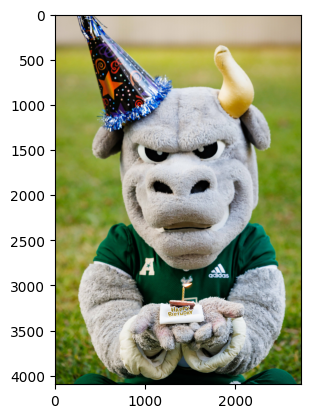

In [8]:
plt.imshow(np.squeeze(content_img))

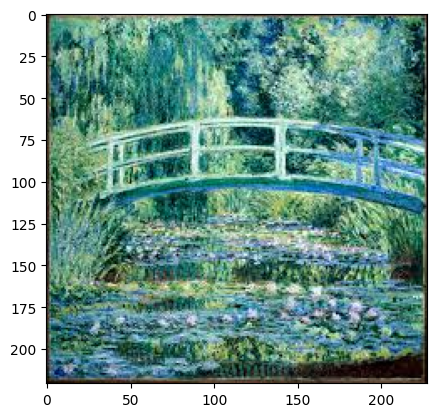

In [9]:
plt.imshow(np.squeeze(style_img))

Implementing our style transfer

In [10]:
stylized_image = model(tf.constant(content_img),tf.constant(style_img))[0]

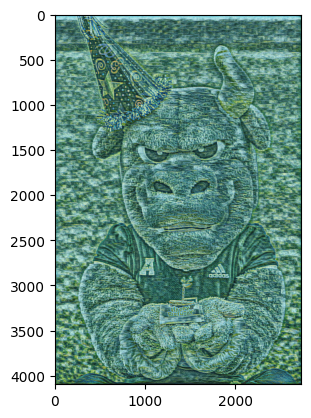

In [13]:
plt.imshow(np.squeeze(stylized_image))

In [28]:
cv2.imwrite('generated_img.jpg',cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))

True